In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import networkx as nx
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [12]:
df=pd.read_csv("/Users/aminginofabbruccibarbagli/Downloads/dataset_clean.csv", sep=';')
df

,m_anno_indagine,m_sesso,m_p_r_eta,m_p_scolarita,m_p_pubblico_privato,m_p_r_ampiezza6,m_istat_reg,m_p_nascita_in_italia_genitori,m_p_frequenza_cinema,m_p_frequenza_teatro,...,m_TREND_37_SCIENZA FECONDA (crede nelle potenzialita' dell'innovazione scientifica),m_TREND_39_SCUOLA E FORMAZIONE (formazione e' una priorita' del Paese),m_TREND_46_SPERIMENTAZIONE GENETICA,m_TREND_53_INCLUSI ED ESCLUSI (si sente pienamente parte della societa),m_TREND_50_IL MODELLO IMPRESA (individua nell'impresa modello economico vincente),m_TREND_56_TERRITORIALITA' (2009) (individua nella difesa della territorialita' l'arma vicente),m_TREND_58_CONFRONTO CON LA GENERAZIONE PASSATA,m_TREND_52_SOLIDARIETA',m_TREND_53_IL PERICOLO POPULISTA,m_TREND_54_DISORIENTAMENTO
0,2017,1,62,laurea specialistica di II livello o laurea 4-...,1,da 100.001 a 250.000,Toscana,1,alcune volte l'anno,piu' raramente,...,slight in trend,in trend,off trend,slight in trend,off trend,off trend,in trend,slight in trend,in trend,slight in trend
1,2017,1,35,laurea triennale di I livello,0,da 30.001 a 100.000,Lombardia,1,mensile,mai,...,in trend,off trend,slight off trend,off trend,slight in trend,slight off trend,slight in trend,in trend,slight off trend,off trend
2,2017,0,50,universita` in corso/nessuna laurea conseguita,1,da 100.001 a 250.000,Sardegna,1,mai,mai,...,slight off trend,off trend,off trend,slight off trend,off trend,slight in trend,in trend,in trend,slight in trend,in trend
3,2017,1,56,master/scuola di specializzazione post laurea,1,da 5.001 a 10.000,Toscana,1,alcune volte l'anno,alcune volte l'anno,...,slight in trend,slight off trend,slight off trend,in trend,off trend,slight off trend,slight in trend,slight off trend,in trend,slight in trend
4,2017,0,46,laurea specialistica di II livello o laurea 4-...,1,piu` di 250.001,Emilia Romagna,1,settimanale,alcune volte l'anno,...,slight off trend,slight off trend,off trend,slight in trend,off trend,in trend,in trend,in trend,off trend,in trend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,2019,1,75,laurea specialistica di II livello o laurea 4-...,0,piu` di 250.001,Lombardia,1,mai,mai,...,slight in trend,non classificati,non classificati,slight off trend,slight in trend,in trend,in trend,in trend,off trend,in trend
4500,2019,1,72,diploma di maturita` (5 anni),0,piu` di 250.001,Lazio,1,mai,mensile,...,in trend,slight off trend,slight off trend,in trend,off trend,slight in trend,slight off trend,in trend,in trend,in trend
4501,2019,0,82,laurea specialistica di II livello o laurea 4-...,0,da 30.001 a 100.000,Lombardia,1,mensile,mai,...,slight in trend,in trend,off trend,slight off trend,slight in trend,non classificati,slight off trend,in trend,slight off trend,in trend
4502,2019,1,59,laurea specialistica di II livello o laurea 4-...,0,piu` di 250.001,Sicilia,1,piu' raramente,alcune volte l'anno,...,in trend,slight off trend,slight off trend,slight off trend,slight in trend,slight off trend,slight in trend,slight off trend,off trend,off trend


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# 1. Filtriamo gli elettori M5S
m5s_mask = df["m_p_int_voto"].str.lower().str.contains("5 stelle", na=False)
df_m5s = df[m5s_mask].copy()

# 2. Selezioniamo le colonne demografiche
#demo_cols = [
 #   "m_sesso",
  #  "m_p_r_eta",
   # "m_p_scolarita",
    #"m_p_nascita_in_italia_genitori",
    #"m_istat_reg",
    #"m_p_r_ampiezza6"
#]

# 3. One-hot encoding
encoder = OneHotEncoder(handle_unknown="ignore")
X_m5s = encoder.fit_transform(df_m5s)

# 4. KMeans
kmeans_m5s = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_kmeans = kmeans_m5s.fit_predict(X_m5s)
sil_kmeans = silhouette_score(X_m5s, labels_kmeans)

# 5. Agglomerative
agglo = AgglomerativeClustering(n_clusters=4)
labels_agglo = agglo.fit_predict(X_m5s.toarray())
sil_agglo = silhouette_score(X_m5s, labels_agglo)

# 6. DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_m5s.toarray())
sil_dbscan = None
if len(set(labels_dbscan)) > 1 and -1 not in set(labels_dbscan):
    sil_dbscan = silhouette_score(X_m5s, labels_dbscan)

# 7. Salvataggio etichette
df_m5s["cluster_kmeans"] = labels_kmeans
df_m5s["cluster_agglo"] = labels_agglo
df_m5s["cluster_dbscan"] = labels_dbscan

sil_kmeans, sil_agglo, sil_dbscan


(0.029529367976337876, 0.007222362300932602, None)

/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


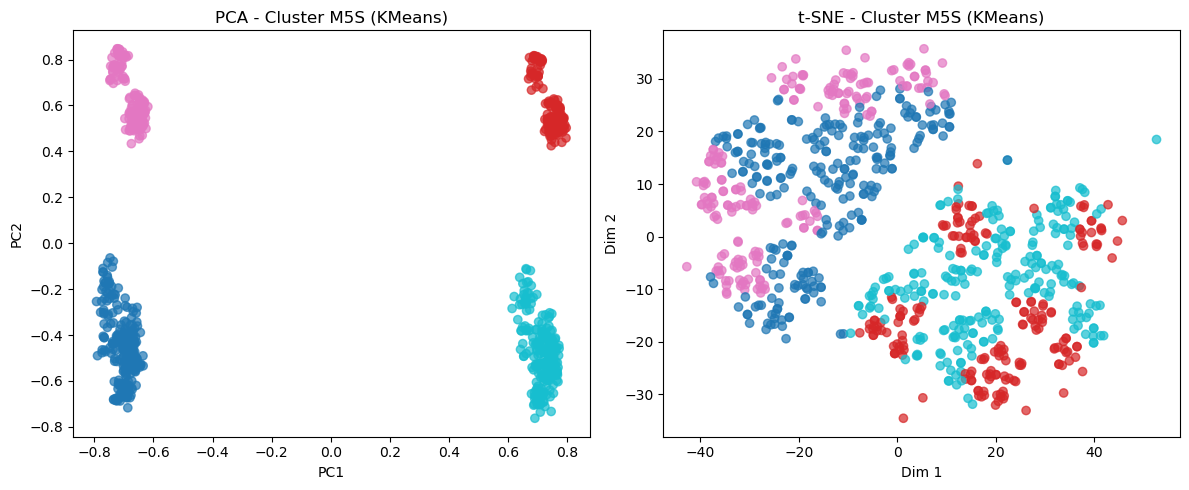

In [13]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# PCA per visualizzazione veloce
pca = PCA(n_components=2, random_state=42)
pca_coords = pca.fit_transform(X_m5s.toarray())

# t-SNE per visualizzazione più "morbida"
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_coords = tsne.fit_transform(X_m5s.toarray())

# Plot PCA
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(pca_coords[:,0], pca_coords[:,1], c=labels_kmeans, cmap="tab10", alpha=0.7)
plt.title("PCA - Cluster M5S (KMeans)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Plot t-SNE
plt.subplot(1,2,2)
plt.scatter(tsne_coords[:,0], tsne_coords[:,1], c=labels_kmeans, cmap="tab10", alpha=0.7)
plt.title("t-SNE - Cluster M5S (KMeans)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")

plt.tight_layout()
plt.show()


In [14]:
import numpy as np

# Otteniamo i centroidi dei cluster KMeans nello spazio one-hot
centroids = kmeans_m5s.cluster_centers_

# Calcoliamo la differenza media assoluta rispetto alla media globale
mean_vector = X_m5s.mean(axis=0).A1
diff_from_mean = np.abs(centroids - mean_vector)

# Sommiamo le differenze per cluster e variabile
importance = diff_from_mean.mean(axis=0)

# Creiamo una tabella con le feature più rilevanti
feature_names = encoder.get_feature_names_out(demo_cols)
important_features = pd.DataFrame({
    "variabile": feature_names,
    "importanza": importance
}).sort_values(by="importanza", ascending=False)

important_features.head(20)


,variabile,importanza
0,m_sesso_0,0.500000
1,m_sesso_1,0.500000
68,m_p_scolarita_diploma di maturita` (5 anni),0.500000
72,m_p_scolarita_laurea specialistica di II livel...,0.126926
75,m_p_scolarita_media inferiore,0.086379
77,m_p_scolarita_universita` in corso/nessuna lau...,0.073895
67,m_p_scolarita_diploma di istituto professional...,0.068469
73,m_p_scolarita_laurea triennale di I livello,0.049743
74,m_p_scolarita_master/scuola di specializzazion...,0.028653
105,m_p_r_ampiezza6_piu` di 250.001,0.024940


In [15]:
# Lista variabili valoriali dal grafico SHAP
value_vars = [
    "immigrants_are_resource",
    "too_much_focus_on_equality",
    "italy_too_many_conc_muslims",
    "legalise_soft_drugs",
    "church_should_not_influence_state",
    "youth_social_eng_declining",
    "support_living_will",
    "north_only_engine_economy",
    "islam_religion_danger",
    "italy_participates_mil_missions",
    "immigrants_bring_crime",
    "working_north_keeps_up_eu",
    "care_only_own_interest",
    "immigrants_steal_jobs",
    "harms_of_populism"
]

# Filtriamo M5S
m5s_mask = df["m_p_int_voto"].str.lower().str.contains("5 stelle", na=False)
df_m5s_values = df[m5s_mask].copy()

# Controlliamo se tutte le variabili sono presenti
missing_vars = [v for v in value_vars if v not in df_m5s_values.columns]
missing_vars


['immigrants_are_resource',
 'too_much_focus_on_equality',
 'italy_too_many_conc_muslims',
 'legalise_soft_drugs',
 'church_should_not_influence_state',
 'youth_social_eng_declining',
 'support_living_will',
 'north_only_engine_economy',
 'islam_religion_danger',
 'italy_participates_mil_missions',
 'immigrants_bring_crime',
 'working_north_keeps_up_eu',
 'care_only_own_interest',
 'immigrants_steal_jobs',
 'harms_of_populism']

In [24]:
import pandas as pd

# Carica il dataset

# Colonna con il voto
VOTE_COL = "m_p_int_voto"

# Maschera per trovare tutte le righe che contengono "5 stelle" (case-insensitive)
mask_m5s = df[VOTE_COL].astype(str).str.lower().str.contains("5 stelle", na=False)

# Filtra il DataFrame
df_m5s = df[mask_m5s].copy()

print(f"Numero di elettori M5S trovati: {len(df_m5s)}")
df_m5s.head()


Numero di elettori M5S trovati: 869


,m_anno_indagine,m_sesso,m_p_r_eta,m_p_scolarita,m_p_pubblico_privato,m_p_r_ampiezza6,m_istat_reg,m_p_nascita_in_italia_genitori,m_p_frequenza_cinema,m_p_frequenza_teatro,...,m_TREND_37_SCIENZA FECONDA (crede nelle potenzialita' dell'innovazione scientifica),m_TREND_39_SCUOLA E FORMAZIONE (formazione e' una priorita' del Paese),m_TREND_46_SPERIMENTAZIONE GENETICA,m_TREND_53_INCLUSI ED ESCLUSI (si sente pienamente parte della societa),m_TREND_50_IL MODELLO IMPRESA (individua nell'impresa modello economico vincente),m_TREND_56_TERRITORIALITA' (2009) (individua nella difesa della territorialita' l'arma vicente),m_TREND_58_CONFRONTO CON LA GENERAZIONE PASSATA,m_TREND_52_SOLIDARIETA',m_TREND_53_IL PERICOLO POPULISTA,m_TREND_54_DISORIENTAMENTO
1,2017,1,35,laurea triennale di I livello,0,da 30.001 a 100.000,Lombardia,1,mensile,mai,...,in trend,off trend,slight off trend,off trend,slight in trend,slight off trend,slight in trend,in trend,slight off trend,off trend
6,2017,0,61,media inferiore,0,da 100.001 a 250.000,Friuli Venezia Giulia,1,piu' raramente,piu' raramente,...,slight in trend,off trend,slight off trend,slight in trend,off trend,in trend,slight off trend,in trend,in trend,in trend
14,2017,0,71,diploma di istituto professionale (3 anni),1,da 5.001 a 10.000,Veneto,1,alcune volte l'anno,alcune volte l'anno,...,slight in trend,slight off trend,off trend,slight in trend,in trend,in trend,slight off trend,in trend,slight off trend,slight off trend
18,2017,1,38,diploma di istituto professionale (3 anni),0,da 5.001 a 10.000,Lombardia,1,alcune volte l'anno,piu' raramente,...,slight off trend,in trend,slight in trend,slight off trend,off trend,in trend,in trend,off trend,in trend,in trend
20,2017,1,47,laurea specialistica di II livello o laurea 4-...,0,da 100.001 a 250.000,Friuli Venezia Giulia,1,settimanale,alcune volte l'anno,...,slight off trend,slight off trend,off trend,slight off trend,in trend,in trend,in trend,in trend,off trend,in trend


In [33]:
# Dopo aver filtrato M5S
mask_m5s = df["m_p_int_voto"].astype(str).str.lower().str.contains("5 stelle", na=False)
df_m5s = df[mask_m5s].copy()

print("Dimensioni subset M5S:", df_m5s.shape)

# Controlla l'intersezione tra colonne richieste e quelle presenti
present_in_subset = [c for c in value_vars_original if c in df_m5s.columns]
print("Colonne valoriali presenti nel subset:", present_in_subset)

# Vedi prime righe per una colonna di test
print(df_m5s[present_in_subset].head())


Dimensioni subset M5S: (869, 161)
Colonne valoriali presenti nel subset: ['m_ac_immigrati_risorsa', 'm_ac_troppo_focus_uguaglianza_vs_merito', 'm_ac_italia_troppeConcessioni_immigratiMusulmani', 'm_ac_legalizz_drogheLeggere', 'm_ac_chiesa_nonDovrebbe_condizionare_stato.1', 'm_ac_impegnoSocialeGiovani_sempreMenoForte', 'm_ac_testamento_biologico', 'm_ac_nord_unicoMotore_economiaItaliana', 'm_ac_religioneIslamica_pericoloPerTutti', 'm_ac_italia_ipartecipazioneIn_missioniMilitariEstere', 'm_ac_immigrati_portano_criminalita', 'm_ac_lavoroNord_consente_diEssere_alPasso_con_UE', 'm_ac_badare_propriInteressi_perSopravvivere', 'm_ac_immigrati_rubano_lavoro', 'm_op_danni_populismo_in_italia']
                             m_ac_immigrati_risorsa  \
1   ne' d'accordo ne' in disaccordo (NON STIMOLARE)   
6                                         d'accordo   
14                                        d'accordo   
18                                        d'accordo   
20  ne' d'accordo ne' in disacco

In [13]:
diz_aliases_ac = {"del tutto d'accordo":2,
            "del tutto<BR>d'accordo":2,
		     "d'accordo":1,
		     "ne' d'accordo ne' in disaccordo (NON STIMOLARE)":0,
             "ne d'accordo ne' in disaccordo":0,
             "ne' d'accordo ne' in disaccordo":0,
             "preferisco non rispondere":0,
             "preferisco<BR>non<BR> rispondere":0,
            "non saprei":0,
             "in disaccordo":-1,
             'del tutto in disaccordo':-2,
             "del tutto disaccordo":-2,
             "del tutto<BR>in disaccordo":-2,
             
            
}

nomi_var = df.columns.tolist()
for var in nomi_var:
    if '_ac_' in var:
        df[var] = df[var].replace(diz_aliases_ac)
        
        
diz_aliases_op = {"molto":2,
            "poco":-1,
            "pocao":-1,
		     "abbastanza":1,
		     "non saprei":0,
            "nessuno":-2,
            "per niente":-2}

nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'op' in var:
        df[var] = df[var].replace(diz_aliases_op)
        

diz_aliases_trend = {"in trend":1,
                 "slight in trend":1,
                 "slight off trend":0,
                 "off trend":0,
                 'non classificati':0}
 
nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'TREND' in var:
        df[var] = df[var].replace(diz_aliases_trend)
        
        
diz_aliases_scol = {"elementare/privo di titolo":1,
                 "media inferiore":1,
                 "diploma di maturita` (5 anni)":2,
                 "superiori in corso":2,
                 'diploma di istituto professionale (3 anni)':2,
                 'universita` in corso/nessuna laurea conseguita':4,
                 'laurea triennale di I livello':4,
                 'diploma universitario/laurea breve':4,
                 'laurea specialistica di II livello o laurea 4-5 anni':4,
                 'master/scuola di specializzazione post laurea':4,
                 'dottorato di ricerca':4
                 }
 
df['m_p_scolarita'] = df['m_p_scolarita'].replace(diz_aliases_scol)



diz_aliases_geo = {'meno di 5.000':1,
                 'da 5.001 a 10.000':1,
                 'da 10.001 a 30.000':2,
                 'da 30.001 a 100.000':2,
                 'da 100.001 a 250.000':3,
                 'piu` di 250.001':3
                 }
 
df['m_p_r_ampiezza6'] = df['m_p_r_ampiezza6'].replace(diz_aliases_geo)

diz_aliases_eco = {
                 "mi sento povero e non arrivo mai a fine mese":-1,
                 "avverto difficolta'":-1,
                 "arrivo a fine mese con molte difficolta'":-1,
                 "con tranquillita'":1,
                 'agiatamente':1
                 }
 
df['m_op_come_reddito_consenteDiVivere'] = df['m_op_come_reddito_consenteDiVivere'].replace(diz_aliases_eco)


df = pd.get_dummies(df, columns=['m_op_preferenza_lavorativa'], prefix='prf_lav',dtype=int)

#df = pd.get_dummies(df, columns=['m_p_zona_5istat'], prefix='zona')
df = pd.get_dummies(df, columns=['m_istat_reg'], prefix='reg',dtype=int)

diz_aliases_quot = {
                 0:0,
                 'preferisco non rispondere':0,
                 "si alcune volte alla settimana":1,
                 "si ogni giorno":1
                 }
 
df['m_p_lettura_quotidiani'] = df['m_p_lettura_quotidiani'].replace(diz_aliases_quot)

diz_aliases_freq_y = {'mai':0,
                     "piu' raramente":0,
                 "alcune volte l'anno":1,
                  "piu' volte alla settimana":2,
                 'mensile':1,
                 'settimanale':2}
 
nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'm_p_' in var:
        df[var] = df[var].replace(diz_aliases_freq_y)
        
        
diz_aliases_freq = {'non saprei':0,
                     "non ascolto la radio":0,
                 "da piu' di un'ora fino a due ore":1,
                  "da piu' di tre ore fino a quattro ore":2,
                 'oltre quattro':2,
                 "da piu' di due ore fino a tre ore":2,
                 "meno di un'ora":1}
 
nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'm_p_' in var:
        df[var] = df[var].replace(diz_aliases_freq)
        

diz_aliases_comp = {
                 0:0,
                 'inferiore':-1,
                 'uguale':0,
                 "maggiore":1,
                 'nan':0
                 }
 
df['m_op_disorientamento_realta_quotidiana_vs_3anniFa'] = df['m_op_disorientamento_realta_quotidiana_vs_3anniFa'].replace(diz_aliases_comp)


diz_aliases_situazEconomic = {
    'rimasta la stessa': 0,
    'peggiorata': -1,
    'non sa/non risponde': 0,
    'nan': 0,
    'migliorata': 1
}
df['m_op_situazEconomic_propria_ultimi10anni'] = df['m_op_situazEconomic_propria_ultimi10anni'].replace(diz_aliases_situazEconomic)


diz_aliases_futEconomic = {
    'peggiorare': -1,
    'rimanere la stessa': 0,
    'non sa/non risponde': 0,
    'nan': 0,
    'migliorare': 1
}
df['m_op_situazEconomic_futura'] = df['m_op_situazEconomic_futura'].replace(diz_aliases_futEconomic)


diz_aliases_abo = {
    'una cattiva legge': -1,
    'una legge buona ma che va cambiata': 1,
    'una buona legge': 1,
    'non saprei/preferisco non rispondere': 0,
    'nan': 0
}

df['m_op_legge_aborto_1987'] = df['m_op_legge_aborto_1987'].replace(diz_aliases_abo)


diz_aliases_eut = {
    'no': -1,
    'si': 2,
    'non sa/non risponde': 0,
    'dipende dalle condizioni':1
}

df['m_op_favore_eutanasia_a_determinate_condizioni'] = df['m_op_favore_eutanasia_a_determinate_condizioni'].replace(diz_aliases_eut)


diz_aliases_identita = {
    "piu' europeo che italiano": 2,
    'sia italiano che europeo': 1,
    'solo italiano': -2,
    "piu' italiano che europeo": -1,
    'non sa - non risponde': 0,
    'solo europeo': 2,
    'nan': 0
}
df['m_op_sentimento_italianoVSeuropeo'] = df['m_op_sentimento_italianoVSeuropeo'].replace(diz_aliases_identita)


diz_aliases_modernizzazione = {
    'si sta modernizzando': 1,
    'sta regredendo': -1,
    'non sa/non risponde': 0,
    'nan': 0
}
df['m_modernizz_vs_regress_Paese'] = df['m_modernizz_vs_regress_Paese'].replace(diz_aliases_modernizzazione)


diz_aliases_vantaggi = {
    "piu' vantaggi": 1,
    'vantaggi e svantaggi in egual misura': 0,
    "piu' svantaggi": -1,
    "ne' vantaggi ne' svantaggi": 0,
    'non sa/non risponde': 0,
    'nan': None
}
df['m_op_partecipazione_in_UE'] = df['m_op_partecipazione_in_UE'].replace(diz_aliases_vantaggi)


diz_aliases_livello = {
    'bassa': -1,
    'media': 1,
    'alta': 2,
    0: 0,
    'nan': None
}
nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'm_op_attenzione_' in var:
        df[var] = df[var].replace(diz_aliases_livello)
        
        
diz_aliases_andamento = {
    'rimasta uguale': 0,
    'peggiorata': -1,
    'migliorata': 1,
    0: 0,
    'nan': None
}
df['m_op_scuolaPubblica_ultimiAnni'] = df['m_op_scuolaPubblica_ultimiAnni'].replace(diz_aliases_andamento)


diz_aliases_quantita = {
    1: 1,
    'poca&nbsp;': -1,
    'molta': 2,
    'nessuna': -2,
    0: 0,
    'nan': None
}
nomi_var = df.columns.tolist()
for var in nomi_var:
    if 'm_op_fiducia_' in var:
        df[var] = df[var].replace(diz_aliases_quantita)
        
        
diz_aliases_postoStabile = {
    "d'accordo": 1,
    'in disaccordo': -1,
    "del tutto d'accordo": 2,
    'del tutto in disaccordo': -2,
    'preferisco non rispondere': 0,
    'nan': None
}
df['m_op_rinuncie_per_postoStabile'] = df['m_op_rinuncie_per_postoStabile'].replace(diz_aliases_postoStabile)


diz_aliases_pop = {
    'molti danni': 2,
    'nessun danno': 0,
    'qualche danno': 1,
    0: 0,
    'nan': None
}


df['m_op_danni_populismo_in_italia'] = df['m_op_danni_populismo_in_italia'].replace(diz_aliases_pop)

/var/folders/gp/yrwgc89d2m51z5wbr12grshh0000gn/T/ipykernel_33674/995830642.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[var] = df[var].replace(diz_aliases_ac)
/var/folders/gp/yrwgc89d2m51z5wbr12grshh0000gn/T/ipykernel_33674/995830642.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[var] = df[var].replace(diz_aliases_op)
/var/folders/gp/yrwgc89d2m51z5wbr12grshh0000gn/T/ipykernel_33674/995830642.py:47: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain 

In [24]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# ------------------------------------------------------------
# 0) Carica/definisci df come nel tuo ambiente
# df = pd.read_csv("...")  # se serve
# ------------------------------------------------------------

# ============================================================
# [NUOVO] Preprocessing per TUTTE le variabili
#    - OneHot per le categoriche
#    - StandardScaler per le numeriche
# ============================================================
# Identifica colonne categoriche e numeriche
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Sostituisci eventuali NaN prima dell'encoding/scaling
df_proc = df.copy()
# Se ci sono NaN nelle categoriche, rimpiazza con stringa "missing"
df_proc[cat_cols] = df_proc[cat_cols].fillna("missing")
# Se ci sono NaN nelle numeriche, rimpiazza con 0 (o una strategia migliore se preferisci)
df_proc[num_cols] = df_proc[num_cols].fillna(0)

# ColumnTransformer:
# - OneHotEncoder(handle_unknown="ignore") per non esplodere su categorie nuove
# - StandardScaler sulle numeriche
# Nota: uso sparse=False per ottenere direttamente una matrice densa compatibile con Agglomerative
preprocessor = ColumnTransformer(
    transformers=[
("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
        ("num", StandardScaler(), num_cols),
    ],
    remainder="drop",
)

# Trasforma il dataset completo (tutte le colonne ora incluse)
X = preprocessor.fit_transform(df_proc)

# (Opzionale) Se vuoi standardizzare ANCHE l'insieme completo dopo l'encoding:
# scaler_all = StandardScaler()
# X = scaler_all.fit_transform(X)

# ============================================================
# 3) KMeans
# ============================================================
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
labels_kmeans = kmeans.fit_predict(X)
sil_kmeans = silhouette_score(X, labels_kmeans)

# ============================================================
# 4) Agglomerative
# ============================================================
agglo = AgglomerativeClustering(n_clusters=4)
labels_agglo = agglo.fit_predict(X)
sil_agglo = silhouette_score(X, labels_agglo)

# ============================================================
# 5) DBSCAN (parametri da tarare!)
# ============================================================
dbscan = DBSCAN(eps=1.5, min_samples=10)
labels_dbscan = dbscan.fit_predict(X)

sil_dbscan = None
valid_mask = labels_dbscan != -1
uniq = set(labels_dbscan[valid_mask])
if len(uniq) > 1:
    sil_dbscan = silhouette_score(X[valid_mask], labels_dbscan[valid_mask])

# ============================================================
# 6) Salva etichette nel dataframe originale
# ============================================================
df["cluster_kmeans"] = labels_kmeans
df["cluster_agglo"] = labels_agglo
df["cluster_dbscan"] = labels_dbscan

print("Silhouette KMeans:", sil_kmeans)
print("Silhouette Agglo:", sil_agglo)
print("Silhouette DBSCAN:", sil_dbscan)

# Esporta dataset con cluster (cambia il path come preferisci)
# Nota: se il path non esiste sul tuo sistema, modifica la destinazione
df.to_csv("dataset_with_clusters.csv", index=False)


Silhouette KMeans: 0.05142742523103938
Silhouette Agglo: 0.018618392639283166
Silhouette DBSCAN: None


Subset su M5S usando la colonna 'm_ac_immigrati_diritto_voto' (n=0). Subset vuoto: ripiego sull’intero dataset.


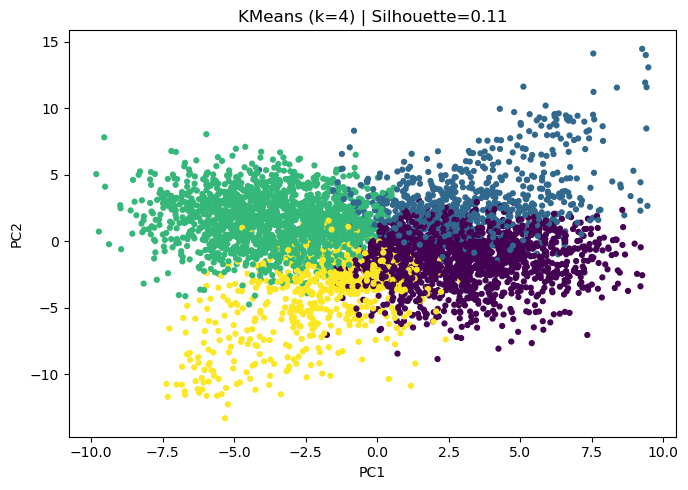

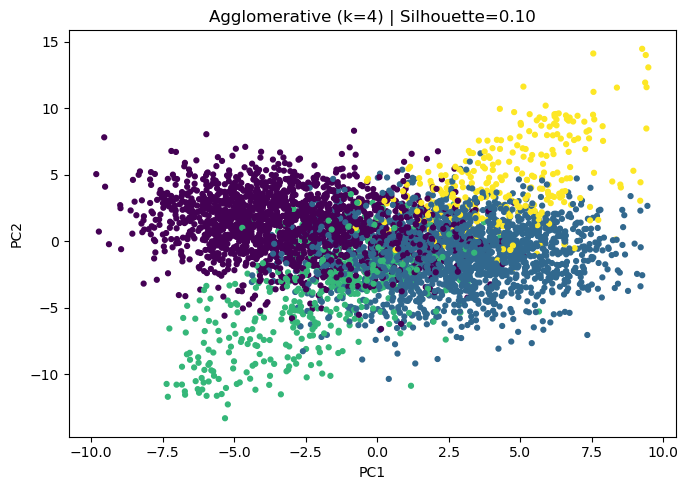

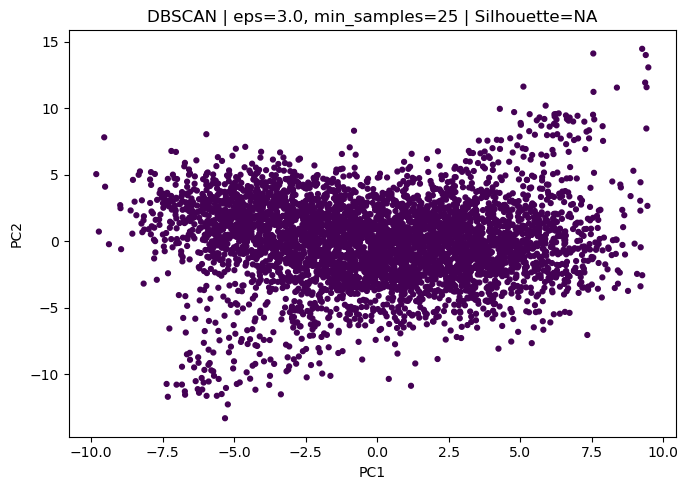

In [36]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# -----------------------
# 0) TROVA LA COLONNA DI INTENZIONE DI VOTO (SE ESISTE)
# -----------------------
vote_col = None
lower_cols = {c.lower(): c for c in df.columns}

# pattern plausibili
candidates = [c for c in df.columns if re.search(r'(int|inten|prefer|scelta).*vot', c.lower()) or 'voto' in c.lower()]
if not candidates and 'm_p_int_voto' in df.columns:
    candidates = ['m_p_int_voto']

if candidates:
    vote_col = candidates[0]  # prendi la prima plausibile

# -----------------------
# 1) SUBSET M5S (se possibile), 
# -----------------------

# Se per qualche motivo il subset è vuot
if len(df_work) == 0:
    df_work = df.copy()
    subset_info += " Subset vuoto: ripiego sull’intero dataset."
    print(subset_info)

# -----------------------
# 2) PREPROCESSING COMPLETO (categoriche + numeriche)
# -----------------------
X_full = df_work.copy()

cat_cols = X_full.select_dtypes(include=["object"]).columns.tolist()
num_cols = X_full.select_dtypes(exclude=["object"]).columns.tolist()

# gestisci missing
X_full[cat_cols] = X_full[cat_cols].fillna("missing")
X_full[num_cols] = X_full[num_cols].fillna(0)

# compatibilità sklearn (sparse_output vs sparse)
from sklearn.preprocessing import OneHotEncoder as _OHE
ohe_kwargs = {}
try:
    _ = _OHE(handle_unknown="ignore", sparse_output=False)
    ohe_kwargs["sparse_output"] = False
except TypeError:
    ohe_kwargs["sparse"] = False

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", **ohe_kwargs), cat_cols),
        ("num", StandardScaler(), num_cols),
    ],
    remainder="drop",
)

X_enc = preprocessor.fit_transform(X_full)

# -----------------------
# 3) PCA + CLUSTERING
# -----------------------
pca_30 = PCA(n_components=30, random_state=42)
X_pca30 = pca_30.fit_transform(X_enc)

pca_2 = PCA(n_components=2, random_state=42)
X_pca2 = pca_2.fit_transform(X_enc)

# KMeans
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
labels_km = kmeans.fit_predict(X_pca30)
sil_km = silhouette_score(X_pca30, labels_km)

# Agglomerative
agg = AgglomerativeClustering(n_clusters=4)
labels_ag = agg.fit_predict(X_pca30)
sil_ag = silhouette_score(X_pca30, labels_ag)

# DBSCAN
dbscan = DBSCAN(eps=3.0, min_samples=25)
labels_db = dbscan.fit_predict(X_pca30)
mask_valid = labels_db != -1
sil_db = None
if len(set(labels_db[mask_valid])) > 1:
    sil_db = silhouette_score(X_pca30[mask_valid], labels_db[mask_valid])

# -----------------------
# 4) VISUALIZZAZIONI
# -----------------------
plt.figure(figsize=(7,5))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_km, s=12)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title(f"KMeans (k=4) | Silhouette={sil_km:.2f}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_ag, s=12)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title(f"Agglomerative (k=4) | Silhouette={sil_ag:.2f}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_db, s=12)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title(f"DBSCAN | eps=3.0, min_samples=25 | Silhouette={sil_db if sil_db is not None else 'NA'}")
plt.tight_layout()
plt.show()
